In [4]:
import pandas as pd
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings(action="ignore")

In [5]:
df = pd.read_csv("HousingData.csv")

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
dataset=df.copy()

In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
df[df.isnull()==True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.dropna(inplace=True)

In [17]:
print(f"The sum of null values is      : {df.isnull().sum().sum()}")

The sum of null values is      : 0


In [18]:
print(f"The sum of Duplicated values is      : {df.duplicated().sum().sum()}")

The sum of Duplicated values is      : 0


In [19]:
print(f"DataFrame shape       : {df.shape}")

DataFrame shape       : (394, 14)


In [20]:
len(df.columns)

14

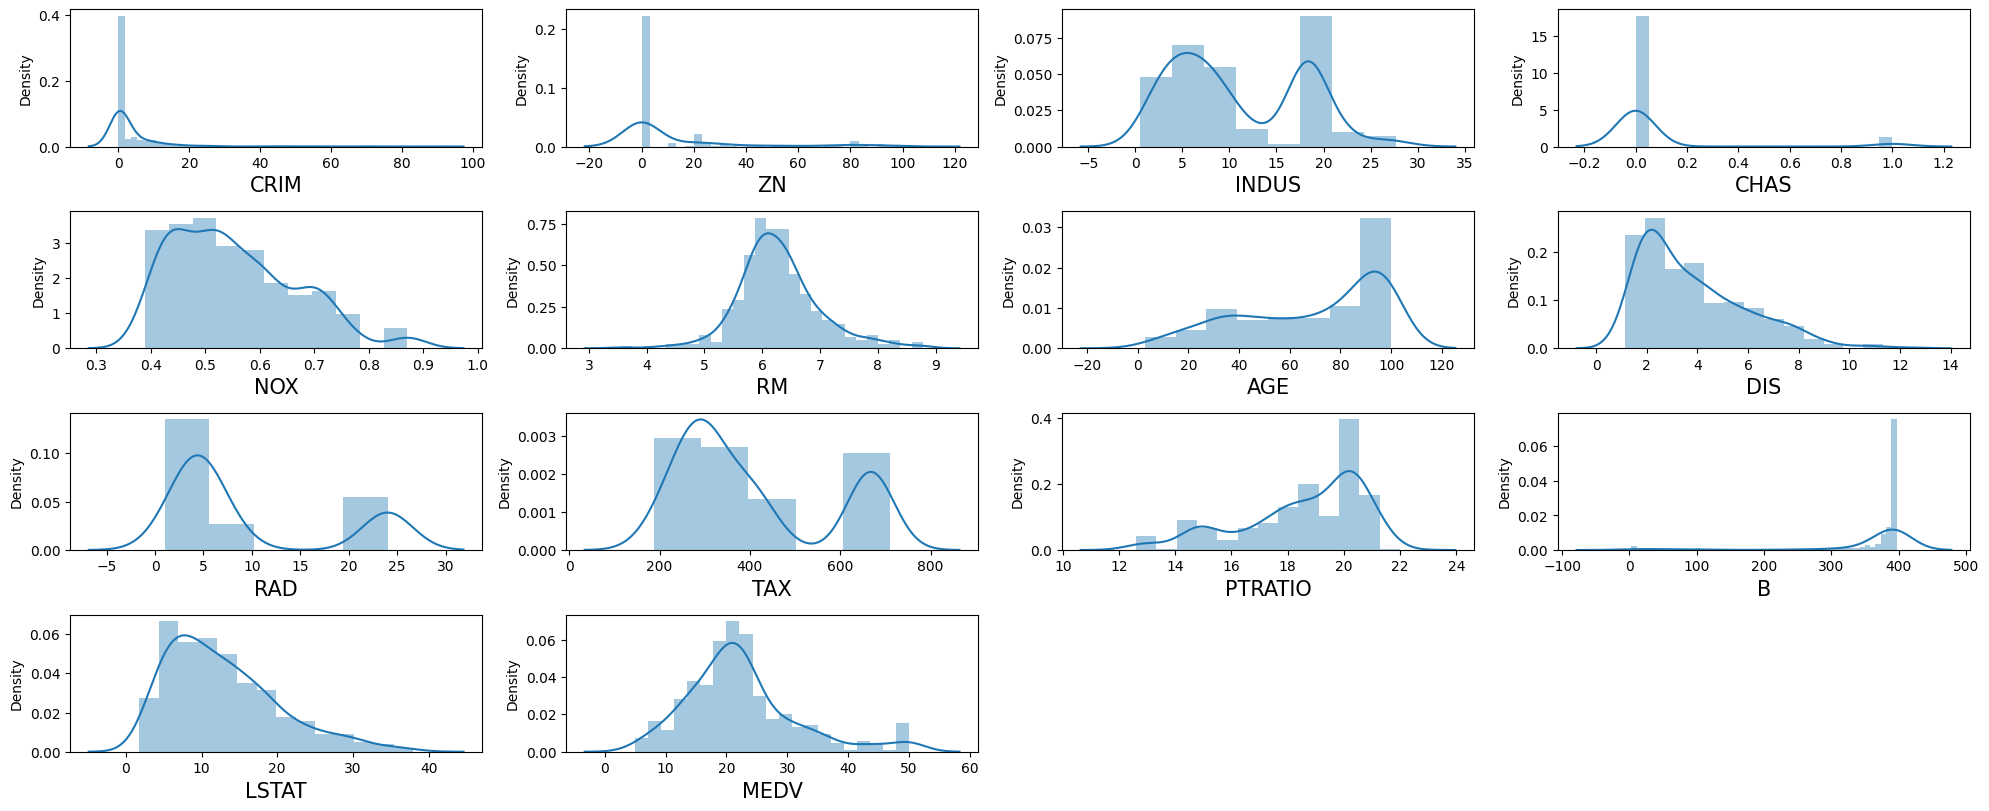

In [21]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

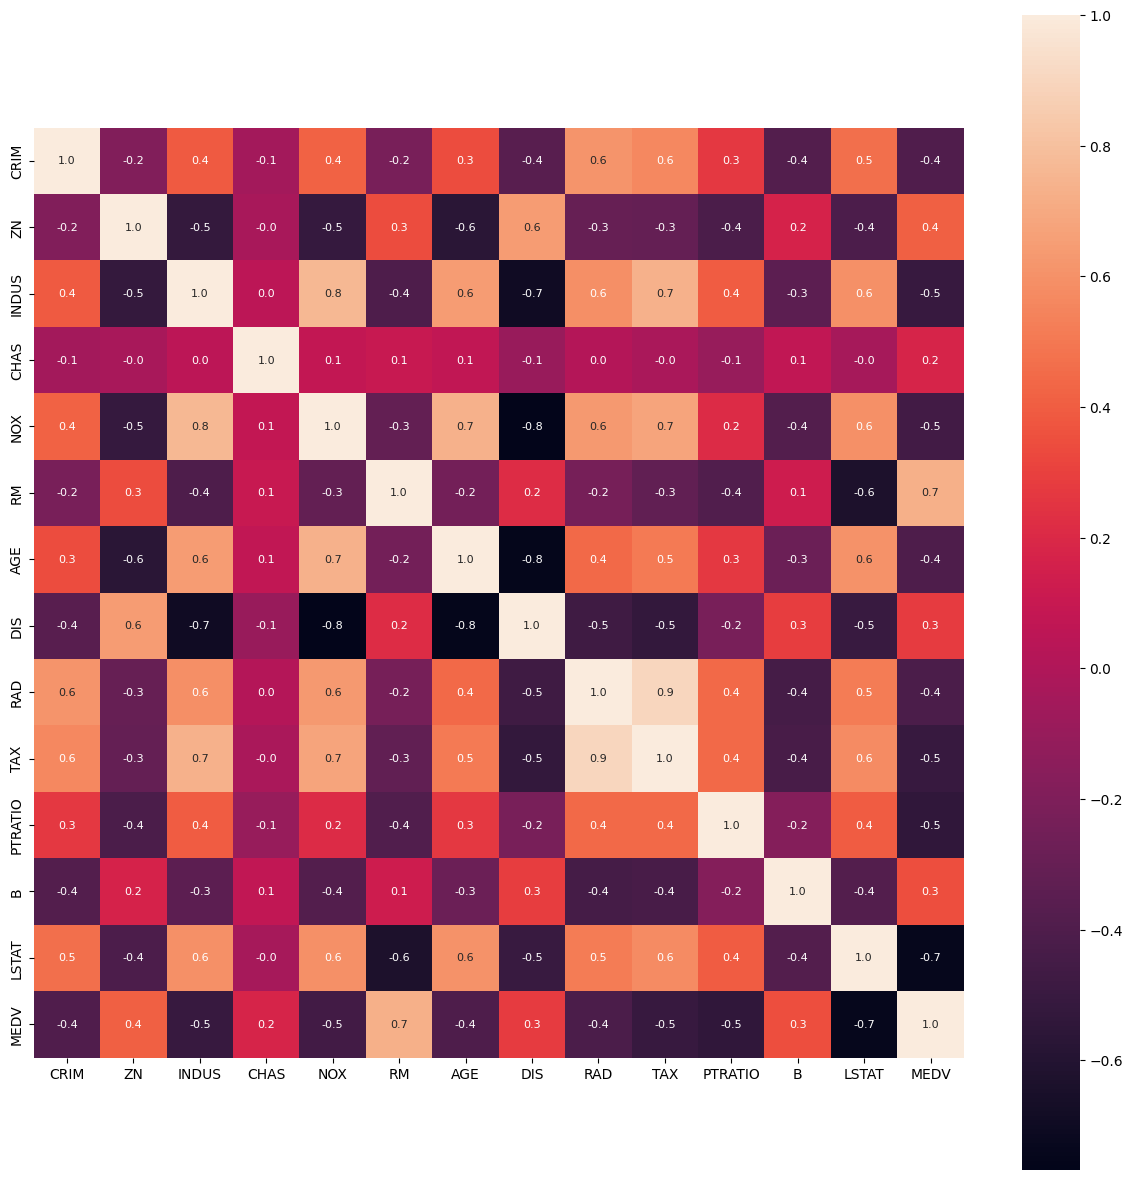

In [22]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':8})

In [25]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X=df.drop(columns=['MEDV'],axis=1)
y=df.MEDV

In [28]:
print(f"X shape       : {X.shape}")
print(f"Y shape       : {y.shape}")

X shape       : (394, 13)
Y shape       : (394,)


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
print(f"X shape       : {X.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")

X shape       : (394, 13)
X_train shape : (275, 13)
X_test shape  : (119, 13)


In [31]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
X_train=scaler.fit_transform(X_train)

In [33]:
X_test=scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression=LinearRegression()

In [36]:
regression.fit(X_train,y_train)

LinearRegression()

In [37]:
print(regression.coef_)

[-1.16422484  1.06108499  0.39032387  0.29209079 -1.99660097  2.919107
 -0.56678274 -2.98589329  2.41887408 -2.87948075 -1.92242361  0.87551786
 -2.71551439]


In [38]:
model_train=regression.predict(X_train)  


In [39]:
 score1=metrics.r2_score(y_train,model_train)
 score2=metrics.mean_absolute_error(y_train,model_train)

In [40]:
print(f"Score of R2 for testing       : {score1}")
print(f"Score of MAE for testing       : {score2}")

Score of R2 for testing       : 0.7938985557779464
Score of MAE for testing       : 2.850239756838445


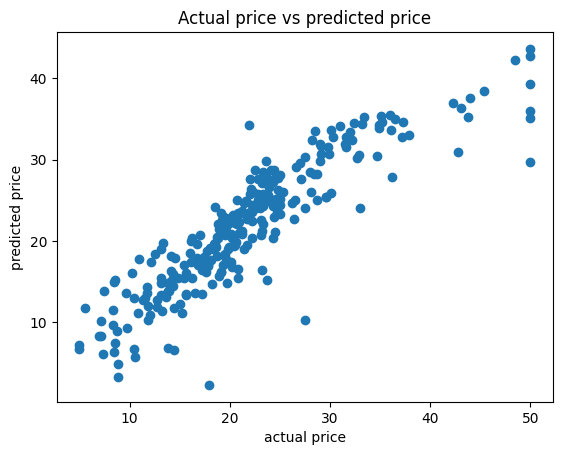

In [41]:
plt.scatter(y_train,model_train)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [42]:
model_test=regression.predict(X_test)  

In [43]:
 score1=metrics.r2_score(y_test,model_test)
 score2=metrics.mean_absolute_error(y_test,model_test)

In [44]:
print(f"Score of R2 for testing       : {score1}")
print(f"Score of MAE for testing       : {score2}")

Score of R2 for testing       : 0.6905175764205996
Score of MAE for testing       : 3.455821007247994


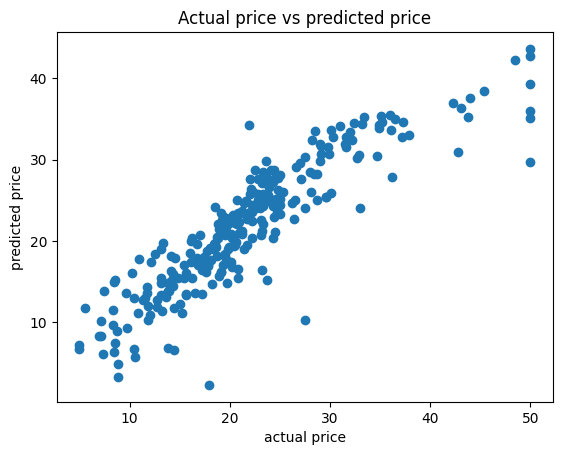

In [45]:
plt.scatter(y_train,model_train)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

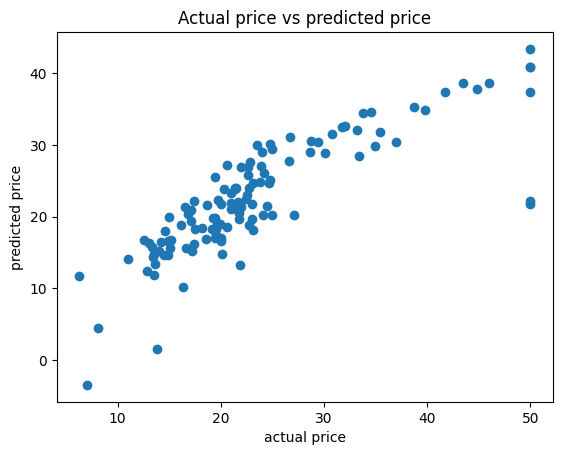

In [46]:
plt.scatter(y_test,model_test)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,model_test))
print(mean_squared_error(y_test,model_test))
print(np.sqrt(mean_squared_error(y_test,model_test)))

3.455821007247994
28.870771928253443
5.373152885248422


In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,model_test)
print(score)

0.6905175764205996


In [49]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6522007049298166

In [50]:
df.iloc[1].values.reshape(1, -1)

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00, 2.1600e+01]])

In [51]:
print(scaler.n_features_in_)  # This will print 13

13


In [52]:
 print(df.iloc[0].shape)       # Will likely print (14,)
print(df.columns)             # Check all column names


(14,)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [53]:
features = scaler.feature_names_in_  # works in sklearn >=1.0
X_input = df[features].iloc[0].values.reshape(1, -1)
scaled_input = scaler.transform(X_input)


In [54]:
# Ensure you use only the features the scaler/model were trained on
features = scaler.feature_names_in_  # works in sklearn >=1.0
X_input = df[features].iloc[1].values.reshape(1, -1)
scaled_input = scaler.transform(X_input)
prediction = regression.predict(scaled_input)


In [55]:
print(prediction)

[24.96232096]


## Pickling The Model file For Deployment

In [57]:
import pickle

In [58]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [59]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [60]:
print(prediction)

[24.96232096]


In [61]:
features = scaler.feature_names_in_  # works in sklearn >=1.0
X_input = df[features].iloc[1].values.reshape(1, -1)
scaled_input = scaler.transform(X_input)
prediction = pickled_model.predict(scaled_input)

In [62]:
prediction

array([24.96232096])